<a href="https://colab.research.google.com/github/ReidelVichot/PUS2022_Heat-TreesPHL/blob/main/HeatMapVisualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.6 MB/s 
     |████████████████████████████████| 16.6 MB 70.1 MB/s 
     |████████████████████████████████| 7.8 MB 15.9 MB/s 


In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Importing the dataframes from the PUS2022 google drive folder
heat_shape = gpd.GeoDataFrame.from_file("/content/drive/Shareddrives/PUS2022/Heat_Trees_project/heat.shp")


heat_shape['dbh_trees'] = heat_shape["ave_dbh"] * heat_shape["num_trees"]

[]

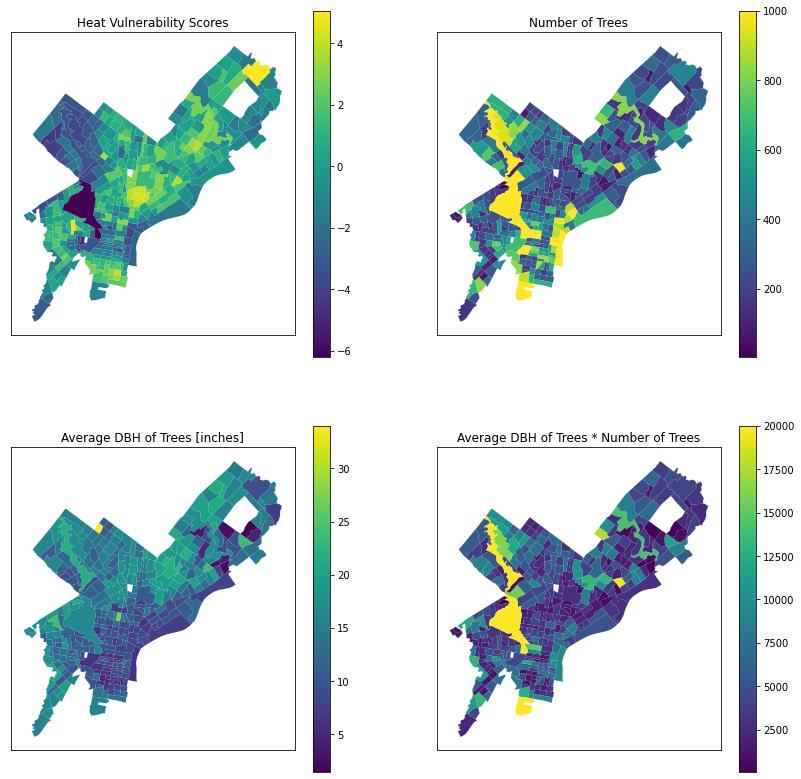

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(14, 14))
heat_shape.plot('HVI_SCORE', ax=ax[0,0], legend=True)
ax[0,0].set_title("Heat Vulnerability Scores")
heat_shape.plot('num_trees', ax=ax[0,1], legend=True, vmax=1000)
ax[0,1].set_title("Number of Trees")
heat_shape.plot('ave_dbh', ax=ax[1,0], legend=True)
ax[1,0].set_title("Average DBH of Trees [inches]")
heat_shape.plot('dbh_trees', ax=ax[1,1], legend=True, vmax=20000)
ax[1,1].set_title("Average DBH of Trees * Number of Trees")

ax[0,0].set_yticks([])
ax[0,1].set_yticks([])
ax[1,0].set_yticks([])
ax[1,1].set_yticks([])
ax[0,0].set_xticks([])
ax[0,1].set_xticks([])
ax[1,0].set_xticks([])
ax[1,1].set_xticks([])

**Heat Vulnerability Score:** This figure shows the heat vulnerability score of each of the census tract in Philadelphia. The higher the score, the more vulnerable to heat is the population in that census tract. 

**Number of Trees**: Number of trees per census tract is represented. The highest number of trees in a census tract in Philadelphia is 8,177 while the mean of trees per census tract is approximately 389. Therefore, the range of the maximum value of the legend was reduced to 1000 to correct the visualization from outliers and show more nuances

**Average DBH of Trees**: The average DBH of trees is the average diameter of trees at breast high. This graphic shows the average DBH of all the trees per census tract. 

**Average DBH of Trees * Number of Trees**: This measure would be the equivalent of the total diameter of all trees in each census tract. As there are outliers that have more trees, the legend of this measure corrected by setting a maximum value of 20,000.    


In [12]:
heat_shape.num_trees.describe()

count     374.000000
mean      388.957219
std       478.637155
min         5.000000
25%       190.250000
50%       297.000000
75%       463.000000
max      8177.000000
Name: num_trees, dtype: float64